In [9]:
import alborexdata
import netCDF4
import glob
import os
import json
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap 
import numpy as np
import datetime
import cmocean
from geopy.distance import vincenty
from importlib import reload

In [49]:
reload(alborexdata)

<module 'alborexdata' from '/home/ctroupin/Publis/201703_AlborexData/python/alborexdata.py'>

In [45]:
with open('alborexconfig.json') as json_data_file:
    config = json.load(json_data_file)

In [46]:
frontcoords = "../data/front_coordinates.dat"
f = alborexdata.Front()
f.get_from_file(frontcoords)
f.smooth()

In [50]:
datadir = config["datadirs"]["drifters"]
datafilelist = sorted(glob.glob(os.path.join(datadir, "*.nc")))

/home/ctroupin/Publis/201703_AlborexData/python/alborexdata.py:262: RuntimeWarning: divide by zero encountered in true_divide
  self.velocity = distancevec / timevec
/home/ctroupin/Publis/201703_AlborexData/python/alborexdata.py:262: RuntimeWarning: invalid value encountered in true_divide
  self.velocity = distancevec / timevec


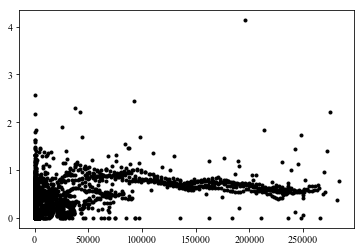

In [80]:
plt.figure()
for datafile in datafilelist:
    d = alborexdata.Drifter()
    d.get_from_netcdf(datafile)
    # Apply quality flags
    d.apply_qc_latlon(QC=[1])
    # Select mission period
    d.select_dates(finaldate=datetime.datetime(2014, 6, 1, 0, 0))
    d.get_distance_front(f.lon, f.lat)
    d.compute_velocity(velmax=5.)
    plt.plot(d.distance2front[:-1], d.velocity, "k.")
# plt.xlim(0, 2000)
plt.show()
plt.close()

### Plot

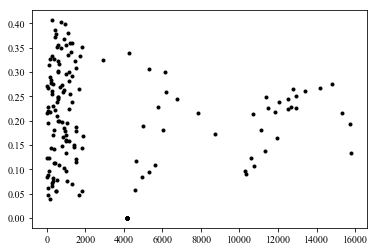

In [66]:
np.min(d.distance2front)

21.050651154998583

In [73]:
lond = d.lon.compressed()
latt = d.lat.compressed()